In [66]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [67]:
os.chdir(r"C:\Users\BigDog\Desktop\Python\Covid_19\covid_19_analysis\datasets")

In [68]:
drop_columns = ['geoId', 'countryterritoryCode', 'day', 'month', 'year']

In [69]:
#target_country = "China"

In [106]:
# Import and format dataframe
covid19_df = pd.read_csv('COVID-19-geographic-disbtribution-worldwide-2020-04-16.csv', engine='python')

In [107]:
covid19_df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,16/04/2020,16,4,2020,70,2,Afghanistan,AF,AFG,37172386.0
1,15/04/2020,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0
2,14/04/2020,14,4,2020,58,3,Afghanistan,AF,AFG,37172386.0
3,13/04/2020,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
4,12/04/2020,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0


In [108]:
covid19_df['dateRep'] = pd.to_datetime(covid19_df['dateRep'], dayfirst=True)
covid19_df.drop(columns=drop_columns, inplace=True)
covid19_df.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2018
0,2020-04-16,70,2,Afghanistan,37172386.0
1,2020-04-15,49,2,Afghanistan,37172386.0
2,2020-04-14,58,3,Afghanistan,37172386.0
3,2020-04-13,52,0,Afghanistan,37172386.0
4,2020-04-12,34,3,Afghanistan,37172386.0


In [109]:
# Create df for one country
#country_df = covid19_df.loc[covid19_df.countriesAndTerritories == "China"].copy()

country_df = covid19_df.copy() 
country_df.sort_values(by=['dateRep'], ascending=True, inplace=True)
country_df.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2018
3025,2019-12-31,0,0,Dominican_Republic,10627165.0
3770,2019-12-31,0,0,France,66987244.0
2729,2019-12-31,0,0,Czechia,10625695.0
7716,2019-12-31,0,0,North_Macedonia,2082958.0
621,2019-12-31,0,0,Australia,24992369.0


In [110]:
# Add cumulative columns for cases and deaths
# country_df['Cum Cases'] = country_df['cases'].cumsum()
# country_df['Cum Deaths'] = country_df['deaths'].cumsum()
country_df['Cum Cases'] = country_df.groupby("countriesAndTerritories")['cases'].cumsum()
country_df['Cum Deaths'] = country_df.groupby("countriesAndTerritories")['deaths'].cumsum()
country_df.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2018,Cum Cases,Cum Deaths
3025,2019-12-31,0,0,Dominican_Republic,10627165.0,0,0
3770,2019-12-31,0,0,France,66987244.0,0,0
2729,2019-12-31,0,0,Czechia,10625695.0,0,0
7716,2019-12-31,0,0,North_Macedonia,2082958.0,0,0
621,2019-12-31,0,0,Australia,24992369.0,0,0


In [111]:
# Create column for days since x deaths
country_df['flag'] = np.where(country_df['Cum Cases'] > 100, 1, 0) # this is fine to calculate globaly as its a true false, no agregaton at this stage

# Here I use the same logic as you. I filter the dataframe on cases (impartant to note i'm only filtering the grouped by dataframe). I then groupby the countriesAndTerritories
# column (again creating a unique dataframe for each country) and applying a cumulative sum to the "flag" column
country_df['flag'] = country_df.loc[country_df['Cum Cases'] > 100].groupby("countriesAndTerritories")['flag'].cumsum()

In [134]:
country_df['case_rate_inc'] = country_df.groupby("countriesAndTerritories")['cases'].pct_change() * 100
country_df['death_rate_inc'] = country_df.groupby("countriesAndTerritories")['deaths'].pct_change() * 100

In [168]:
country_df['5D_MA_cases'] = country_df.groupby("countriesAndTerritories")['case_rate_inc'].rolling(window=5).mean().reset_index(0,drop=True)
country_df['5D_MA_deaths'] = country_df.groupby("countriesAndTerritories")['death_rate_inc'].rolling(window=5).mean().reset_index(0,drop=True)
country_df.loc[country_df['Cum Cases'] > 2000].groupby("countriesAndTerritories").head()

,dateRep,cases,deaths,countriesAndTerritories,popData2018,Cum Cases,Cum Deaths,flag,case_rate_inc,death_rate_inc,5D_MA_cases,5D_MA_deaths,11D_MA_cases,11D_MA_deaths,21D_MA_cases,21D_MA_deaths,7D_MA_cases,7D_MA_deaths
2253,2020-01-27,787,25,China,1.392730e+09,2775,81,9.0,18.345865,66.666667,55.141162,NaN,NaN,NaN,NaN,NaN,137.593983,NaN
2252,2020-01-28,1753,25,China,1.392730e+09,4528,106,10.0,122.744600,0.000000,85.832939,NaN,184.079370,NaN,NaN,NaN,55.880806,NaN
2251,2020-01-29,1466,26,China,1.392730e+09,5994,132,11.0,-16.371934,4.000000,49.156490,27.466667,153.045558,NaN,NaN,NaN,54.582639,NaN
2250,2020-01-30,1740,38,China,1.392730e+09,7734,170,12.0,18.690314,46.153846,38.840499,23.364103,91.108314,NaN,NaN,NaN,61.640439,NaN
2249,2020-01-31,1980,43,China,1.392730e+09,9714,213,13.0,13.793103,13.157895,31.440390,25.995682,100.183088,NaN,NaN,NaN,39.752267,28.092153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6793,2020-04-16,115,6,Moldova,3.545883e+06,2049,46,24.0,-48.198198,50.000000,42.061432,NaN,19.713012,NaN,0.219313,NaN,33.904287,NaN
9145,2020-04-16,447,0,Singapore,5.638676e+06,3699,10,47.0,33.832335,-100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1031,2020-04-16,447,3,Belarus,9.485386e+06,3728,36,17.0,23.480663,-25.000000,3.936488,3.333333,42.134365,NaN,NaN,NaN,20.345376,NaN
349,2020-04-16,0,4,Argentina,4.449450e+07,2432,109,28.0,-100.000000,-42.857143,15.434051,31.904762,1.771003,28.701299,NaN,NaN,11.819776,37.278912


In [169]:
country_df['7D_MA_cases'] = country_df.groupby("countriesAndTerritories")['case_rate_inc'].rolling(window=7).mean().reset_index(0,drop=True)
country_df['7D_MA_deaths'] = country_df.groupby("countriesAndTerritories")['death_rate_inc'].rolling(window=7).mean().reset_index(0,drop=True)

In [170]:
top_count = country_df['countriesAndTerritories'].value_counts().iloc[:20]

In [171]:
top_count = list(top_count.keys())

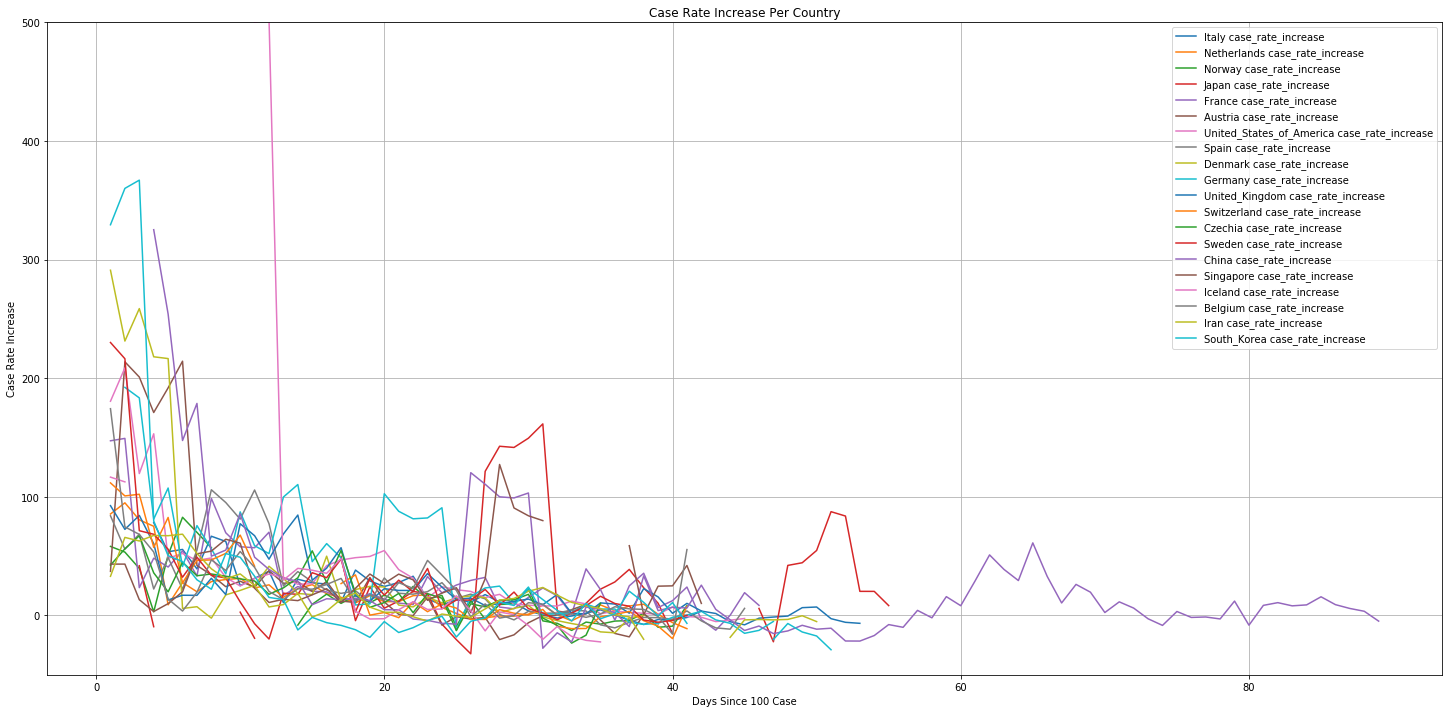

In [174]:
# Visualising the Linear Regression results
plt.figure(figsize=(25, 12))
for country in top_count:
#    plt.scatter(coutry_df[country_df["countriesAndTerritories"] == country]["flag"],
#                df_model_train[df_model_train["tempCountry"] == country]["case_rate_increase"],
#                marker="o", label=f"{country} case rate increase")
#     plt.scatter(X_test[X_test["countryName"] == country]["flag"], X_test[X_test["countryName"] == country]["actualCases"], marker="x", label= f"{country} test actual cases")
    
    plt.plot(country_df[country_df["countriesAndTerritories"] == country]["flag"],
             country_df[country_df["countriesAndTerritories"] == country]["5D_MA_cases"], label=f"{country} case_rate_increase")
#     plt.plot(X_test[X_test["countryName"] == country]["flag"], X_test[X_test["countryName"] == country]["rf_prediction"])
plt.title('Case Rate Increase Per Country')
plt.xlabel('Days Since 100 Case')
#plt.legend()
plt.ylabel('Case Rate Increase')
plt.ylim(-50, 500)
#plt.xlim(0, 90)
plt.grid()
plt.legend()
plt.show()

In [15]:
# as you can see because the groupby filtered out rows where cases were less than 100 the flag is now showing NaN values. All I do here is fill these nans with 0
country_df[country_df.countriesAndTerritories =="China"].iloc[15:25]

,dateRep,cases,deaths,countriesAndTerritories,popData2018,Cum Cases,Cum Deaths,flag
1594,2020-01-15,0,1,China,1.392730e+09,59,2,NaN
1593,2020-01-16,0,0,China,1.392730e+09,59,2,NaN
1592,2020-01-17,4,0,China,1.392730e+09,63,2,NaN
1591,2020-01-18,17,0,China,1.392730e+09,80,2,NaN
1590,2020-01-19,136,1,China,1.392730e+09,216,3,1.0
1589,2020-01-20,19,0,China,1.392730e+09,235,3,2.0
1588,2020-01-21,151,3,China,1.392730e+09,386,6,3.0
1587,2020-01-22,140,11,China,1.392730e+09,526,17,4.0
1586,2020-01-23,97,0,China,1.392730e+09,623,17,5.0
1585,2020-01-24,259,9,China,1.392730e+09,882,26,6.0


In [16]:
country_df.flag.fillna(0, inplace=True) # fill the nans in the flag column as a reult of mergining in the filtered groupby

In [17]:
# I'll store the new dataframe as a new vairable so we can refer back to the dataframe above, country_df

# first drop the columns we dont want, becasue once we have the dummy/ categorical columns it gets harder to work out which cols to keep
df_model = country_df.drop(columns=["dateRep", "cases", "deaths", "popData2018"]) 
df_model.head()

,countriesAndTerritories,Cum Cases,Cum Deaths,flag
2579,Finland,0,0,0.0
1450,Cases_on_an_international_conveyance_Japan,0,0,0.0
2130,Dominican_Republic,0,0,0.0
2897,Germany,0,0,0.0
6070,Qatar,0,0,0.0
